# Introduction
Exploration de la table des joueurs afin de sélectionner les meilleurs :

- 10 attaquants
- 5 défenseurs
- 2 goalers

Principes de choix : performance et fiabilité (nb de match).

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Options for pandas
pd.options.display.max_columns = 70
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2
# Visualizations
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

In [2]:
import os
PATH = "DATA/"

# Exploration
Apprivoiser les informations joueurs

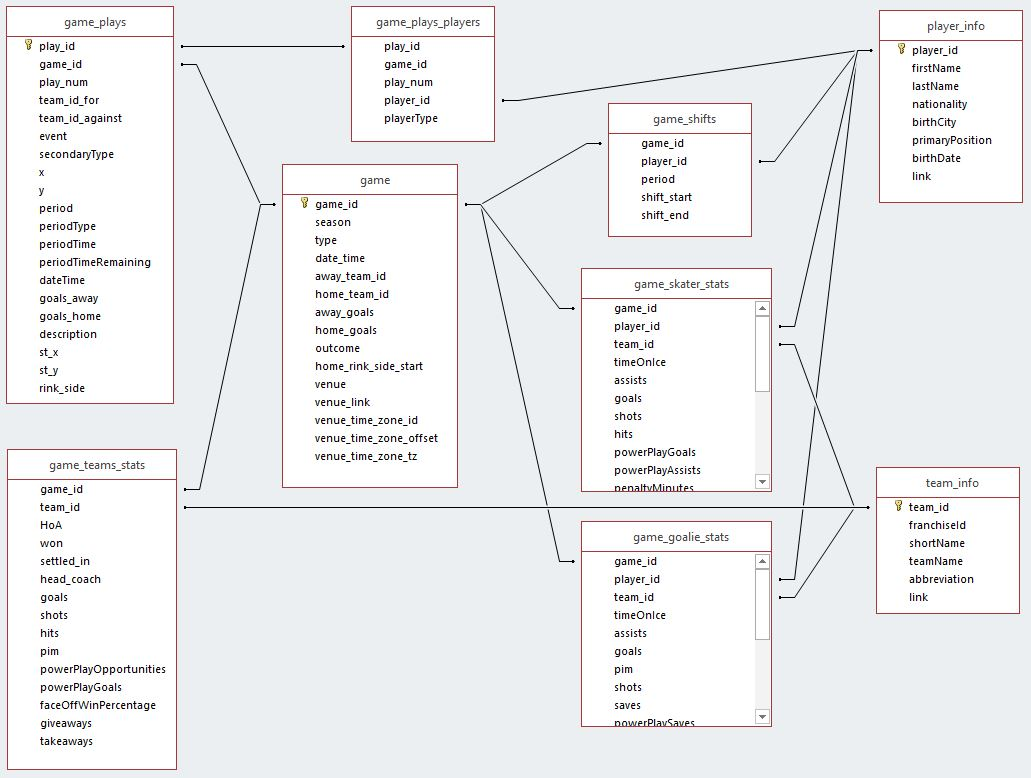

In [3]:
from IPython.display import Image
Image(PATH + "table_relationships.JPG")

In [3]:
list_fichiers = os.listdir(PATH)
for f in list_fichiers:
    print(f)

game_shifts.csv
game_skater_stats.csv
game_goalie_stats.csv
game_plays.csv
team_info.csv
game_plays_players.csv
player_info.csv
game_teams_stats.csv
game.csv
table_relationships.JPG


In [4]:
player_info = pd.read_csv(PATH + "player_info.csv",parse_dates=[6])
skater_info = pd.read_csv(PATH + "game_skater_stats.csv")
goalie_info = pd.read_csv(PATH + "game_goalie_stats.csv")
games_info = pd.read_csv(PATH + "game_teams_stats.csv")
games = pd.read_csv(PATH + "game.csv",parse_dates=[3])

In [5]:
field_player = ['firstName','lastName','nationality','primaryPosition','birthDate','player_id']
skater_info_plus = skater_info.merge(player_info[field_player],how='left',on='player_id')
#skater_info_plus.head(20)

### Les joueurs n'ont qu'un seul primaryPosition à travers toutes les saisons ?

In [6]:
s = skater_info_plus[['player_id','primaryPosition']].drop_duplicates().sort_values('player_id').groupby(['player_id']).nunique()
skater_info_plus.query("firstName == 'Paul' & lastName == 'Byron'").primaryPosition.unique()
s.query('primaryPosition > 1')

array(['LW'], dtype=object)

,player_id,primaryPosition
player_id,,


In [44]:
skater_info_plus.primaryPosition.unique()

array(['LW', 'D', 'RW', 'C'], dtype=object)

#### Non, les joueurs n'ont qu'une seule position

In [7]:
skater_info_plus['is_defense'] = np.where(skater_info_plus.primaryPosition == 'D',1,0)

In [8]:
field_games = ['game_id','season','type','date_time','away_team_id','home_team_id','outcome']
skater_info_plus2 = skater_info_plus.merge(games[field_games],how='left',on='game_id')
#skater_info_plus2.head()

In [9]:
skater_info_plus2['age_at_game'] = skater_info_plus2.eval('date_time - birthDate', engine='python')
skater_info_plus2['age_at_game'] = np.floor(skater_info_plus2['age_at_game'] / np.timedelta64(1, 'Y'))

skater_info_plus2['goals_per_minute'] = np.where(skater_info_plus2.eval('timeOnIce/goals/60') == np.inf,60,skater_info_plus2.eval('timeOnIce/goals/60'))
skater_info_plus2['assists_per_minute'] = np.where(skater_info_plus2.eval('timeOnIce/assists/60') == np.inf,60,skater_info_plus2.eval('timeOnIce/assists/60'))
skater_info_plus2['shots_per_minute'] = np.where(skater_info_plus2.eval('timeOnIce/shots/60') == np.inf,60,skater_info_plus2.eval('timeOnIce/shots/60'))
skater_info_plus2['hits_per_minute'] = np.where(skater_info_plus2.eval('timeOnIce/hits/60') == np.inf,60,skater_info_plus2.eval('timeOnIce/hits/60'))
skater_info_plus2['blocked_per_minute'] = np.where(skater_info_plus2.eval('timeOnIce/blocked/60') == np.inf,60,skater_info_plus2.eval('timeOnIce/blocked/60'))
skater_info_plus2['perc_faceoff'] = skater_info_plus2.eval('faceOffWins / faceoffTaken')
skater_info_plus2.head(25)

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,firstName,lastName,nationality,primaryPosition,birthDate,is_defense,season,type,date_time,away_team_id,home_team_id,outcome,age_at_game,goals_per_minute,assists_per_minute,shots_per_minute,hits_per_minute,blocked_per_minute,perc_faceoff
0,2011030221,8467412,1,999,0,0,1,3,0,0,0,0,0,0,0,0,0,0,-1,885,98,16,Alexei,Ponikarovsky,UKR,LW,1980-04-09,0,20112012,P,2012-04-29,1,4,home win OT,32.0,60.000000,60.000000,16.650000,5.550000,60.000000,NaN
1,2011030221,8468501,1,1168,0,0,0,4,0,0,0,0,0,1,1,0,0,1,0,767,401,0,Anton,Volchenkov,RUS,D,1982-02-25,1,20112012,P,2012-04-29,1,4,home win OT,30.0,60.000000,60.000000,60.000000,4.866667,19.466667,NaN
2,2011030221,8470609,1,558,0,0,2,1,0,0,0,0,2,0,0,0,0,1,-1,542,0,16,Steve,Bernier,CAN,RW,1985-03-31,0,20112012,P,2012-04-29,1,4,home win OT,27.0,60.000000,60.000000,4.650000,9.300000,9.300000,0.000000
3,2011030221,8471816,1,1134,0,0,1,4,0,0,0,0,0,1,0,0,0,1,-1,935,183,16,Mark,Fayne,USA,D,1987-05-15,1,20112012,P,2012-04-29,1,4,home win OT,24.0,60.000000,60.000000,18.900000,4.725000,18.900000,NaN
4,2011030221,8472410,1,436,0,0,1,3,0,0,0,3,6,0,0,0,0,0,-1,436,0,0,Stephen,Gionta,USA,RW,1983-10-09,0,20112012,P,2012-04-29,1,4,home win OT,28.0,60.000000,60.000000,7.266667,2.422222,60.000000,0.500000
5,2011030221,8471233,1,1344,0,1,4,0,1,0,0,13,21,0,1,0,0,1,-1,949,239,156,Travis,Zajac,CAN,C,1985-05-13,0,20112012,P,2012-04-29,1,4,home win OT,26.0,22.400000,60.000000,5.600000,60.000000,22.400000,0.619048
6,2011030221,8470920,1,837,1,0,2,5,0,0,0,1,2,1,0,0,0,2,1,756,0,81,David,Clarkson,CAN,RW,1984-03-31,0,20112012,P,2012-04-29,1,4,home win OT,28.0,60.000000,13.950000,6.975000,2.790000,6.975000,0.500000
7,2011030221,8473646,1,465,0,0,2,3,0,0,0,1,1,0,0,0,0,0,-1,465,0,0,Ryan,Carter,USA,LW,1983-08-03,0,20112012,P,2012-04-29,1,4,home win OT,28.0,60.000000,60.000000,3.875000,2.583333,60.000000,1.000000
8,2011030221,8470610,1,1327,1,1,3,3,0,1,0,0,0,1,0,0,0,2,0,903,268,156,Zach,Parise,USA,LW,1984-07-28,0,20112012,P,2012-04-29,1,4,home win OT,27.0,22.116667,22.116667,7.372222,7.372222,11.058333,NaN
9,2011030221,8472382,1,1324,0,0,1,0,0,0,2,0,0,0,0,0,0,1,-2,1085,220,19,Andy,Greene,USA,D,1982-10-30,1,20112012,P,2012-04-29,1,4,home win OT,29.0,60.000000,60.000000,22.066667,60.000000,22.066667,NaN


In [10]:
fields = ['firstName','lastName','birthDate','player_id','is_defense','season','timeOnIce',
'assists','goals','shots','hits','powerPlayGoals','powerPlayAssists','penaltyMinutes',
'perc_faceoff','takeaways','giveaways','shortHandedGoals','shortHandedAssists','blocked','plusMinus',
'goals_per_minute','assists_per_minute','shots_per_minute','hits_per_minute','blocked_per_minute']

group_by_fields = ['firstName','lastName','birthDate','player_id','is_defense','season']

dict_stats = {'timeOnIce' : ['count','sum','mean','std','max'],
    'assists' : ['sum','mean','std','max'],
    'goals' : ['sum','mean','std','max'],
    'shots' : ['sum','mean','std','max'],
    'hits' : ['sum','mean','std','max'],
    'powerPlayGoals' : ['sum','mean','std','max'],
    'powerPlayAssists' : ['sum','mean','std','max'],
    'penaltyMinutes' : ['sum','mean','std','max'],
    'perc_faceoff' : ['sum','mean','std','max'],
    'takeaways' : ['sum','mean','std','max'],
    'giveaways' : ['sum','mean','std','max'],
    'shortHandedGoals' : ['sum','mean','std','max'],
    'shortHandedAssists' : ['sum','mean','std','max'],
    'blocked' : ['sum','mean','std','max'],
    'goals_per_minute' : ['sum','mean','std','max','min'],
    'assists_per_minute' : ['sum','mean','std','max','min'],
    'shots_per_minute' : ['sum','mean','std','max','min'],
    'hits_per_minute' : ['sum','mean','std','max','min'],
    'blocked_per_minute' : ['sum','mean','std','max','min'],
    'plusMinus': ['sum','mean','std','max','min']}

#skater_season_desc = skater_info_plus2.groupby
skater_desc = skater_info_plus2[fields].groupby(group_by_fields).agg(dict_stats)

In [11]:
skater_desc.query('lastName == "Crosby"').goals

sum      mean  \
firstName lastName birthDate  player_id is_defense season                    
Sidney    Crosby   1987-08-07 8471675   0          20102011   32  0.780488   
                                                   20112012   11  0.392857   
                                                   20122013   22  0.440000   
                                                   20132014   37  0.397849   
                                                   20142015   30  0.365854   
                                                   20152016   42  0.403846   
                                                   20162017   52  0.525253   
                                                   20172018   38  0.404255   
                                                   20182019   35  0.421687   

                                                                  std  max  
firstName lastName birthDate  player_id is_defense season                   
Sidney    Crosby   1987-08-07 8471675   0          20102011  0.880687    3  
                                                   20112012  0.628890    2  
                                                   20122013  0.704504    3  
                                                   20132014  0.627967    3  
                                                   20142015  0.618884    2  
                                                   20152016  0.661261    3  
                                                   20162017  0.690215    3  
                                                   20172018  0.610291    3  
                                                   20182019  0.627043    3

In [12]:
skater_desc.query('lastName == "Gallagher"').goals

sum      mean  \
firstName lastName  birthDate  player_id is_defense season                    
Brendan   Gallagher 1992-05-06 8475848   0          20122013   17  0.346939   
                                                    20132014   23  0.234694   
                                                    20142015   27  0.287234   
                                                    20152016   19  0.358491   
                                                    20162017   11  0.157143   
                                                    20172018   31  0.378049   
                                                    20182019   33  0.402439   

                                                                   std  max  
firstName lastName  birthDate  player_id is_defense season                   
Brendan   Gallagher 1992-05-06 8475848   0          20122013  0.480929    1  
                                                    20132014  0.425986    1  
                                                    20142015  0.521007    2  
                                                    20152016  0.522359    2  
                                                    20162017  0.404171    2  
                                                    20172018  0.558663    2  
                                                    20182019  0.625779    3

In [13]:
last_season = '20182019'
skater_desc_last = skater_desc.query('season == @last_season')
skater_desc_last.reset_index(inplace=True)
#skater_desc_last.head(20)

In [14]:
max_toi = skater_desc_last.timeOnIce['sum'].max()
max_assists = skater_desc_last.assists['sum'].max()
max_goals = skater_desc_last.goals['sum'].max()
max_shots = skater_desc_last.shots['sum'].max()
max_hits = skater_desc_last.hits['sum'].max()
max_fo = skater_desc_last.perc_faceoff['mean'].max()
max_blocked = skater_desc_last.blocked['sum'].max()
max_pm = skater_desc_last.plusMinus['sum'].max()
#skater_desc_last[skater_desc_last.goals['sum'] >= max_goals]

In [15]:
print("max time on ice : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.timeOnIce['sum'] >= max_toi].values) + " avec : " + str(max_toi))
print("max assists : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.assists['sum'] >= max_assists].values) + " avec : " + str(max_assists))
print("max goals : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.goals['sum'] >= max_goals].values) + " avec : " + str(max_goals))
print("max shots : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.shots['sum'] >= max_shots].values) + " avec : " + str(max_shots))
print("max hits : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.hits['sum'] >= max_hits].values) + " avec : " + str(max_hits))
print("max faceOff : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.perc_faceoff['mean'] >= max_fo].values) + " avec : " + str(max_fo))
print("max blocked : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.blocked['sum'] >= max_blocked].values) + " avec : " + str(max_blocked))
print("max plus/minus : " + str(skater_desc_last[['firstName','lastName','is_defense']][skater_desc_last.plusMinus['sum'] >= max_pm].values) + " avec : " + str(max_pm))
#skater_desc_last[['firstName','lastName','primaryPosition']]

max time on ice : [['Brent' 'Burns' 1]] avec : 157578
max assists : [['Nikita' 'Kucherov' 0]] avec : 89
max goals : [['Alex' 'Ovechkin' 0]] avec : 55
max shots : [['Nathan' 'MacKinnon' 0]] avec : 422
max hits : [['Ryan' 'Reaves' 0]] avec : 343
max faceOff : [['Alex' 'Goligoski' 1]
 ['Anders' 'Bjork' 0]
 ['Brady' 'Skjei' 1]
 ['Brandon' 'Carlo' 1]
 ['Brett' 'Pesce' 1]
 ['Christian' 'Folin' 1]
 ['Danny' "O'Regan" 0]
 ['Dennis' 'Cholowski' 1]
 ['Jamie' 'McGinn' 0]
 ['Jared' 'Spurgeon' 1]
 ['Jordan' 'Kyrou' 0]
 ['MacKenzie' 'Weegar' 1]
 ['Marcus' 'Pettersson' 1]
 ['Matt' 'Beleskey' 0]
 ['Nathan' 'Bastian' 0]
 ['Nicolas' 'Deslauriers' 0]
 ['Remi' 'Elie' 0]
 ['Ron' 'Hainsey' 1]
 ['Ryan' 'Suter' 1]
 ['Samuel' 'Girard' 1]
 ['Shea' 'Theodore' 1]
 ['Taro' 'Hirose' 0]
 ['Tyler' 'Ennis' 0]] avec : 1.0
max blocked : [['Ian' 'Cole' 1]] avec : 213
max plus/minus : [['Brett' 'Pesce' 1]] avec : 39


In [16]:
skater_desc.query("firstName == 'Brett' & lastName == 'Pesce'")

timeOnIce          \
                                                                count     sum   
firstName lastName birthDate  player_id is_defense season                       
Brett     Pesce    1994-11-15 8477488   1          20152016        69   77700   
                                                   20162017        82  104325   
                                                   20172018        65   81526   
                                                   20182019        88  110535   

                                                                          \
                                                                    mean   
firstName lastName birthDate  player_id is_defense season                  
Brett     Pesce    1994-11-15 8477488   1          20152016  1126.086957   
                                                   20162017  1272.256098   
                                                   20172018  1254.246154   
                                                   20182019  1256.079545   

                                                                               \
                                                                    std   max   
firstName lastName birthDate  player_id is_defense season                       
Brett     Pesce    1994-11-15 8477488   1          20152016  129.743836  1386   
                                                   20162017  138.884250  1637   
                                                   20172018  117.821373  1575   
                                                   20182019  165.810598  2122   

                                                            assists            \
                                                                sum      mean   
firstName lastName birthDate  player_id is_defense season                       
Brett     Pesce    1994-11-15 8477488   1          20152016      12  0.173913   
                                                   20162017      18  0.219512   
                                                   20172018      16  0.246154   
                                                   20182019      28  0.318182   

                                                                           \
                                                                  std max   
firstName lastName birthDate  player_id is_defense season                   
Brett     Pesce    1994-11-15 8477488   1          20152016  0.381812   1   
                                                   20162017  0.445121   2   
                                                   20172018  0.468734   2   
                                                   20182019  0.578254   2   

                                                            goals            \
                                                              sum      mean   
firstName lastName birthDate  player_id is_defense season                     
Brett     Pesce    1994-11-15 8477488   1          20152016     4  0.057971   
                                                   20162017     2  0.024390   
                                                   20172018     3  0.046154   
                                                   20182019     7  0.079545   

                                                                           \
                                                                  std max   
firstName lastName birthDate  player_id is_defense season                   
Brett     Pesce    1994-11-15 8477488   1          20152016  0.235401   1   
                                                   20162017  0.155207   1   
                                                   20172018  0.211451   1   
                                                   20182019  0.272139   1   

                                                            shots            \
                                                              sum      mean   
firstName lastName birthDate  p

In [ ]:
skater_desc_last

# Results
Show graphs and stats here

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



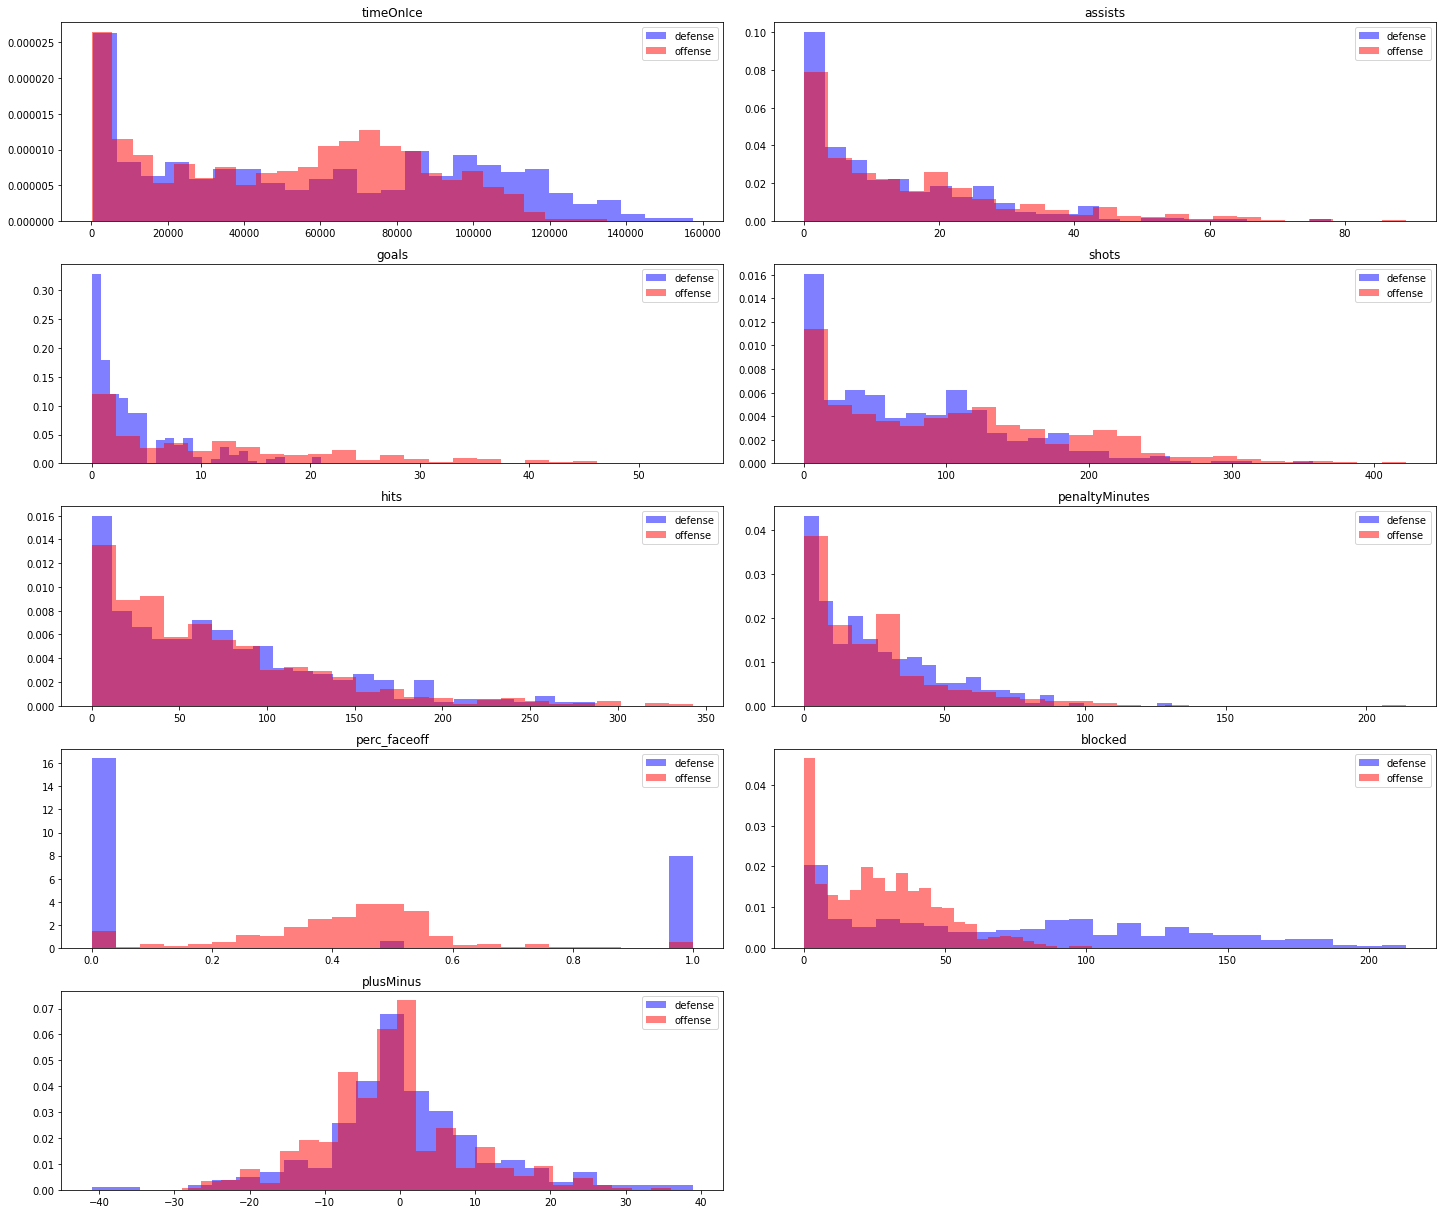

In [93]:
metrics = ['timeOnIce', 'assists', 'goals', 'shots', 'hits','penaltyMinutes', 'perc_faceoff', 'blocked','plusMinus']

f = plt.figure(figsize=(20,30))

for n,m in enumerate(metrics):
    f.add_subplot(9,2,n+1,title=m)
    #plt.subplot(9,2,n+1)
    if m == 'perc_faceoff':
        defense = skater_desc_last[skater_desc_last.is_defense == 1][m]['mean']
        offense = skater_desc_last[skater_desc_last.is_defense == 0][m]['mean']
    else:
        defense = skater_desc_last[skater_desc_last.is_defense == 1][m]['sum']
        offense = skater_desc_last[skater_desc_last.is_defense == 0][m]['sum']
    h1 = plt.hist(defense,bins=25,alpha=0.5,color='b',label='defense',log=False,density=True)
    h2 = plt.hist(offense,bins=25,alpha=0.5,color='r',label='offense',log=False,density=True)
    plt.legend(loc='upper right')
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)

In [112]:
defense = skater_desc_last[skater_desc_last.is_defense == 1][metrics]
correl = defense.iloc[:, defense.columns.get_level_values(1)=='sum'].corr()
correl.style.background_gradient(cmap='coolwarm')
#plt.matshow(correl,fignum=f.number)
#plt.show()

,,timeOnIce,assists,goals,shots,hits,penaltyMinutes,perc_faceoff,blocked,plusMinus
,,sum,sum,sum,sum,sum,sum,sum,sum,sum
timeOnIce,sum,1,0.837341,0.757757,0.908458,0.685519,0.661707,0.183094,0.910699,0.187892
assists,sum,0.837341,1,0.820392,0.897891,0.41195,0.480844,0.13459,0.682646,0.21728
goals,sum,0.757757,0.820392,1,0.885598,0.388641,0.443951,0.118213,0.604741,0.192956
shots,sum,0.908458,0.897891,0.885598,1,0.571139,0.584485,0.127783,0.769854,0.164184
hits,sum,0.685519,0.41195,0.388641,0.571139,1,0.71896,0.0854773,0.69709,0.095282
penaltyMinutes,sum,0.661707,0.480844,0.443951,0.584485,0.71896,1,0.0737377,0.656305,0.129122
perc_faceoff,sum,0.183094,0.13459,0.118213,0.127783,0.0854773,0.0737377,1,0.162857,0.124191
blocked,sum,0.910699,0.682646,0.604741,0.769854,0.69709,0.656305,0.162857,1,0.2394
plusMinus,sum,0.187892,0.21728,0.192956,0.164184,0.095282,0.129122,0.124191,0.2394,1


In [113]:
defense = skater_desc_last[skater_desc_last.is_defense == 0][metrics]
correl = defense.iloc[:, defense.columns.get_level_values(1)=='sum'].corr()
correl.style.background_gradient(cmap='coolwarm')
#plt.matshow(correl,fignum=f.number)
#plt.show()

,,timeOnIce,assists,goals,shots,hits,penaltyMinutes,perc_faceoff,blocked,plusMinus
,,sum,sum,sum,sum,sum,sum,sum,sum,sum
timeOnIce,sum,1,0.864074,0.870151,0.930212,0.468396,0.567805,0.644584,0.774222,0.17534
assists,sum,0.864074,1,0.851211,0.849899,0.193981,0.434043,0.519146,0.555713,0.271685
goals,sum,0.870151,0.851211,1,0.927994,0.292288,0.479427,0.467245,0.594135,0.273933
shots,sum,0.930212,0.849899,0.927994,1,0.392632,0.542411,0.500685,0.652741,0.189103
hits,sum,0.468396,0.193981,0.292288,0.392632,1,0.661096,0.31328,0.556232,0.106439
penaltyMinutes,sum,0.567805,0.434043,0.479427,0.542411,0.661096,1,0.357252,0.473087,0.113802
perc_faceoff,sum,0.644584,0.519146,0.467245,0.500685,0.31328,0.357252,1,0.625748,0.117942
blocked,sum,0.774222,0.555713,0.594135,0.652741,0.556232,0.473087,0.625748,1,0.159327
plusMinus,sum,0.17534,0.271685,0.273933,0.189103,0.106439,0.113802,0.117942,0.159327,1


# Conclusions and Next Steps
Summarize findings here

In [50]:
skater_info_plus2.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'nationality', 'primaryPosition', 'birthDate',
       'season', 'type', 'date_time', 'away_team_id', 'home_team_id',
       'outcome', 'age_at_game', 'perc_faceoff'],
      dtype='object')